<a href="https://colab.research.google.com/github/sim1x/Project-sensors-and-measurements-systems-for-bio-industries/blob/main/SENSORS_AND_MEASUREMENT_SYSTEMS_FOR_BIO_INDUSTRIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### **SENSORS AND MEASUREMENT SYSTEMS FOR BIO-INDUSTRIES**
PROJECT: SIMULATE EXPONENTIAL IEF MODEL OF NEURON

I want to start with the simulation of the simple leaky integrate and fire (IEF) model neuron. In this case i need to simulate only 1 ODE which is the following:
$$C \frac{dV(t)}{dt} = \frac{E - V}{R} + I$$
Using a simple numerical scheme,the forward euler method, i can numerically solve this ODE to find $$V(t)$$ at the current time step using information about the previous value.
Once i have my $$V(t)$$ i have to check if its value is above a certain treshold $\theta$ and if this is the case i have to generate a spike because the neuron is activated! This is done "manually" i.e. the actual dynamic is not modeled like in the zone below the treshold. So this IEF model uses a dynamic model until $$V(t)$$ hits $\theta$.After this the tension $$V(t)$$ is reset to its resting potential and kept there for a refractory period $\tau_{arp}$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Useful variables used during simulation
T = 300# Maximal lifetime of the simulation [ms]
Tarp  = 5  # Absolute refractory period [ms]
dt= 0.1    # Integration time tep by which t is incremented as time goes by [ms]
R = 20   # <embrane (specific) resistance [MOhm/cm^2]
C = 1    # Membrane (specific) capacitance [uF/cm^2]
E = -70  # Membrane resting potential [mV]
teta = -50  # Excitability threshold [mV]
Vmax = 10   # Peak voltage during a spike [mV] - purely aesthetical reasons!

# now i can start coding a function to implement IEF. I will consider the general case where current I in the model can be variable with time
def IEF(I):
# Initalisation of the data structures
   time =np.arange(0,T,dt) #create vector time
   #As said, I ia a function of time and this means that its length is equal to time!
   N    = len(I) # N is length of for loop
   W    = np.zeros((N,1))  # Array containing V as the time goes by

   Nspikes = 0        # Counter for the number of spikes

   # Initial conditions:
   V     = E          # Membrane voltage of the cell [mV]
   ko    = -100       # Last time (as integer) an action potential occurred
  # Euler method ---------------------------------------------------------------
   for k in range(N): # Loop over each discrete step for time t

      if (V >= teta):     # Ops! V just exceeded the threshold: an AP will occur!
        W[k] = Vmax    # You will understand why I say: this is only "aesthetic"
        V  = E         # V is then re-set to the resting potential, after a AP.
        ko = k         # The last time a AP occurred is updated with the current time.
        Nspikes = Nspikes + 1
      elif((k-ko)<(Tarp/dt)): # Otherwise, is the neuron still "refractory" ?
        V = E          # Then B does not change in time: it must be kept "clamped"
        W[k] = E
      else:            # Otherwise
        V = V + dt/(R*C) * (E - V) + dt/C * I[k]  # V evolves, integrating I...
        W[k] = V


   freq = round(1000* Nspikes / T)

   return W, freq



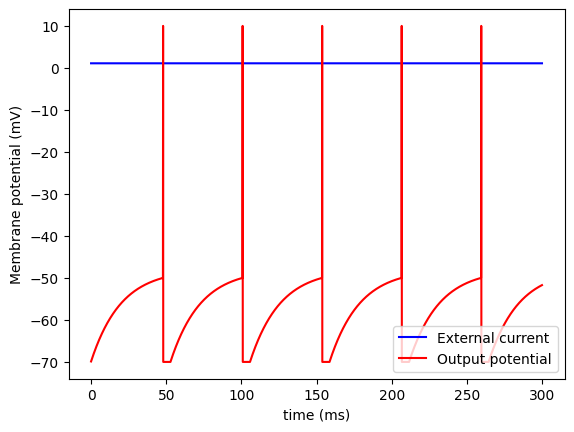

In [ ]:
# Now we use the function
#I need to generate the external current I

T = 300
det= 0.1
time_ms=np.arange(0,T,det) #create vector time

#USE THIS IF YOU WANT TO USE A CONSTANT CURRENT
I = np.full((len(time_ms), 1), 1.1) #Constant current

#USE THIS IF YOU WANT TO USE A VARIABLE CURRENT, FOR EXAMPLE A CURRENT WITH PULSES
#num_of_samples = len(time_ms) # sample count
#P = 1000  # period
#D = 150   # width of pulse
#I= ((np.arange(num_of_samples) % P < D) -5)*20

Out,frequency=IEF(I) # Call the function to simulate my ODE

#Now i plot results: External current I vs V(t) of the model
plt.plot(time_ms,I,'b',time_ms,Out,'r')
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend(["External current", "Output potential"], loc="lower right")



Ok now we can procede with simulation of exponential integrate abnd fire (EIF)

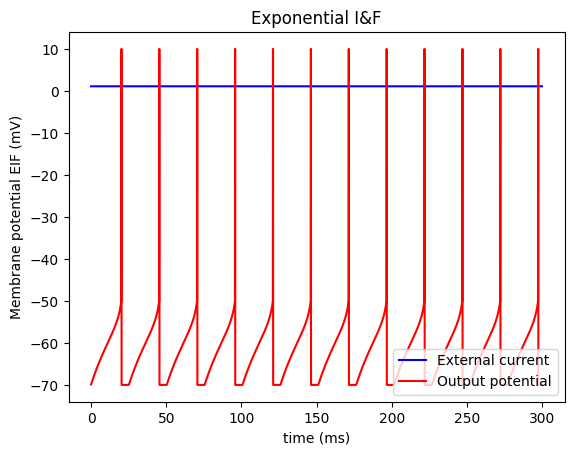

In [ ]:

gl=0.3 #mS/cm^2
deltaT=3.48 #mV
Vt=-59.9 #mV
def expIEF(I):
# Initalisation of the data structures
   time =np.arange(0,T,dt) #create vector time
   #As said, I ia a function of time and this means that its length is equal to time!
   N    = len(I) # N is length of for loop
   W    = np.zeros((N,1))  # Array containing V as the time goes by

   Nspikes = 0        # Counter for the number of spikes

   # Initial conditions:
   V     = E          # Membrane voltage of the cell [mV]
   ko    = -100       # Last time (as integer) an action potential occurred
  # Euler method ---------------------------------------------------------------
   for k in range(N): # Loop over each discrete step for time t

      if (V >= teta):     # Ops! V just exceeded the threshold: an AP will occur!
        W[k] = Vmax    # You will understand why I say: this is only "aesthetic"
        V  = E         # V is then re-set to the resting potential, after a AP.
        ko = k         # The last time a AP occurred is updated with the current time.
        Nspikes = Nspikes + 1
      elif((k-ko)<(Tarp/dt)): # Otherwise, is the neuron still "refractory" ?
        V = E          # Then B does not change in time: it must be kept "clamped"
        W[k] = E
      else:            # Otherwise
        phi=(1/R)*deltaT*np.exp( (V-Vt)/deltaT )
        V = V + dt/(R*C) * (E - V) + dt/C * I[k] + (dt/C)*phi  # V evolves, integrating I...
        W[k] = V


   freq = round(1000* Nspikes / T)

   return W, freq



# Now we use the function
#I need to generate the external current I

T = 300
det= 0.1
time_ms=np.arange(0,T,det) #create vector time

#USE THIS IF YOU WANT TO USE A CONSTANT CURRENT
I = np.full((len(time_ms), 1), 1.1) #Constant current

#USE THIS IF YOU WANT TO USE A VARIABLE CURRENT, FOR EXAMPLE A CURRENT WITH PULSES
#num_of_samples = len(time_ms) # sample count
#P = 1000  # period
#D = 150   # width of pulse
#I= ((np.arange(num_of_samples) % P < D) -5)*20

Out2,frequency2=expIEF(I) # Call the function to simulate my ODE

#Now i plot results: External current I vs V(t) of the model
plt.plot(time_ms,I,'b',time_ms,Out2,'r')
plt.title('Exponential I&F')
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential EIF (mV)')
plt.legend(["External current", "Output potential"], loc="lower right")
